In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import MySQLdb
import sqlalchemy

from sqlalchemy.orm import sessionmaker




from urllib import parse

# matplotlib.rcParams['font.family'] = 'NanumGothic'  # 'Malgun Gothic' (Windows 기본 한글 폰트)
# matplotlib.rcParams['axes.unicode_minus'] = False  # 음수 기호 깨짐 방지

# import matplotlib.font_manager as fm

# font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
# prop = fm.FontProperties(fname=font_path)

# # 사용 가능한 폰트 목록 확인
# for font in fm.fontManager.ttflist:
#     if font.name == 'NanumGothic':
#         print(font.name)
# 
# matplotlib.rcParams['font.family'] = 'Noto Sans CJK KR'  

In [2]:
# connect DB
config_ = {
    'user' : 'team2',
    'passwd' : parse.quote_plus('Encore_team2@'),
    'host' : '222.112.208.67',
    'port' : '13306',
    'DB' : 'team2'
}
engine = sqlalchemy.create_engine(
    f"mysql://{config_['user']}:{config_['passwd']}@{config_['host']}:{config_['port']}/{config_['DB']}",
    echo=True
)

try:
    with engine.connect() as connection:
        print("Database connection successful!")
except Exception as e:
    print(f"Database connection failed: {e}")

2024-11-14 15:58:09,762 INFO sqlalchemy.engine.Engine SELECT DATABASE()
2024-11-14 15:58:09,763 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-11-14 15:58:09,775 INFO sqlalchemy.engine.Engine SELECT @@sql_mode
2024-11-14 15:58:09,776 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-11-14 15:58:09,783 INFO sqlalchemy.engine.Engine SELECT @@lower_case_table_names
2024-11-14 15:58:09,784 INFO sqlalchemy.engine.Engine [raw sql] ()
Database connection successful!


In [3]:
query = "SELECT * FROM sigungu"
df = pd.read_sql(query, engine)

query = "SELECT * FROM gender_age"
ga_df = pd.read_sql(query, engine)

2024-11-14 15:58:10,619 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-11-14 15:58:10,620 INFO sqlalchemy.engine.Engine DESCRIBE `team2`.`SELECT * FROM sigungu`
2024-11-14 15:58:10,620 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-11-14 15:58:10,630 INFO sqlalchemy.engine.Engine SELECT * FROM sigungu
2024-11-14 15:58:10,630 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-11-14 15:58:10,771 INFO sqlalchemy.engine.Engine ROLLBACK
2024-11-14 15:58:10,777 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-11-14 15:58:10,778 INFO sqlalchemy.engine.Engine DESCRIBE `team2`.`SELECT * FROM gender_age`
2024-11-14 15:58:10,778 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-11-14 15:58:10,784 INFO sqlalchemy.engine.Engine SELECT * FROM gender_age
2024-11-14 15:58:10,785 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-11-14 15:58:10,855 INFO sqlalchemy.engine.Engine ROLLBACK


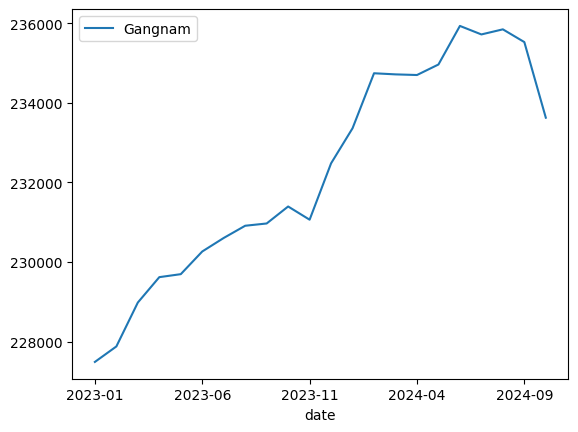

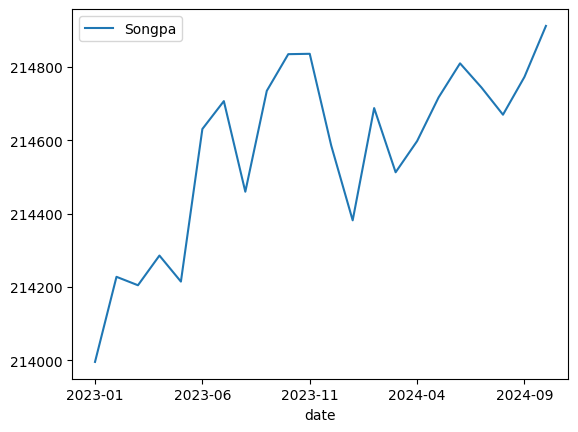

In [4]:
sigungu = df.drop(
    columns=['id']
)
gungu = '강남'
cartype = '승용'

sigungu['date'] = (sigungu['year'].astype(str) + '-' + sigungu['month'].astype(str).str.zfill(2))

tmp = sigungu[(sigungu['district_gugun'].str.contains(gungu)) & (sigungu['car_type'] == cartype)]

# tmp['date'] = pd.to_datetime(tmp['date'], format='%Y%m')

tmp = tmp.sort_values(
    by=['year', 'month']
)
tmp = tmp.rename(
    columns = {
        'num' : 'Gangnam'
    }
)
tmp.reset_index().plot(
    x='date', y='Gangnam',
    # title='Gangnam'
)
# plt.legend()

sigungu = df.drop(
    columns=['id']
)
gungu = '송파'
cartype = '승용'

sigungu['date'] = (sigungu['year'].astype(str) + '-' + sigungu['month'].astype(str).str.zfill(2))

tmp = sigungu[(sigungu['district_gugun'].str.contains(gungu)) & (sigungu['car_type'] == cartype)]

# tmp['date'] = pd.to_datetime(tmp['date'], format='%Y%m')

tmp = tmp.sort_values(
    by=['year', 'month']
)
tmp = tmp.rename(
    columns = {
        'num' : 'Songpa'
    }
)
tmp.reset_index().plot(
    x='date', y='Songpa',
    # title='Gangnam'
)
plt.legend()

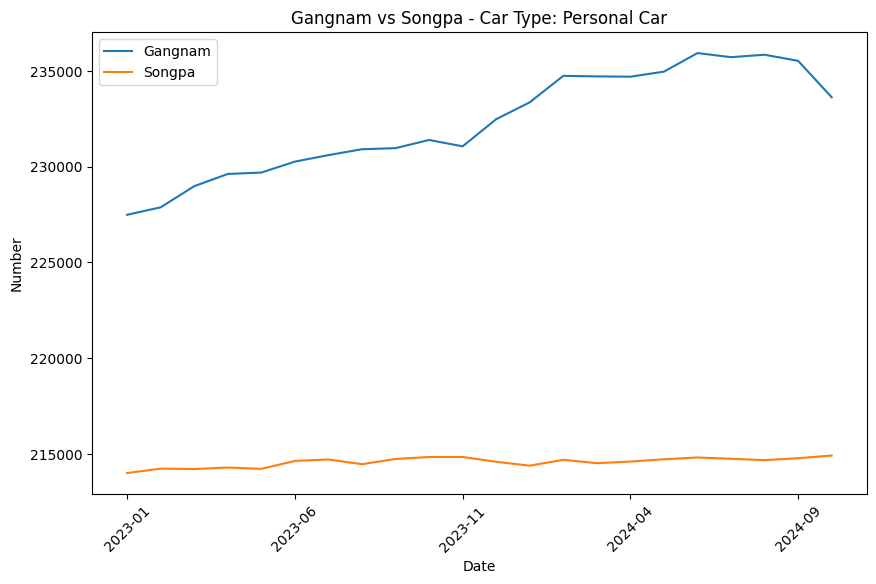

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 강남 데이터
sigungu = df.drop(columns=['id'])
gungu = '강남'
cartype = '승용'

sigungu['date'] = (sigungu['year'].astype(str) + '-' + sigungu['month'].astype(str).str.zfill(2))

tmp = sigungu[(sigungu['district_gugun'].str.contains(gungu)) & (sigungu['car_type'] == cartype)]
tmp = tmp.sort_values(by=['year', 'month'])
tmp = tmp.rename(columns={'num': 'Gangnam'})

# 송파 데이터
sigungu2 = df.drop(columns=['id'])
gungu2 = '송파'
cartype2 = '승용'

sigungu2['date'] = (sigungu2['year'].astype(str) + '-' + sigungu2['month'].astype(str).str.zfill(2))

tmp2 = sigungu2[(sigungu2['district_gugun'].str.contains(gungu2)) & (sigungu2['car_type'] == cartype2)]
tmp2 = tmp2.sort_values(by=['year', 'month'])
tmp2 = tmp2.rename(columns={'num': 'Songpa'})

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))

# 첫 번째 그래프 (강남)
tmp.reset_index().plot(x='date', y='Gangnam', ax=ax, label='Gangnam')

# 두 번째 그래프 (송파)
tmp2.reset_index().plot(x='date', y='Songpa', ax=ax, label='Songpa')

# 범례 추가
plt.legend()

# 그래프 제목, x, y축 레이블 추가 (필요에 따라)
plt.title('Gangnam vs Songpa - Car Type: Personal Car')
plt.xlabel('Date')
plt.ylabel('Number')

# 그래프 출력
plt.xticks(rotation=45)  # x축 레이블 회전 (날짜 형식에 따라 조정)
plt.show()

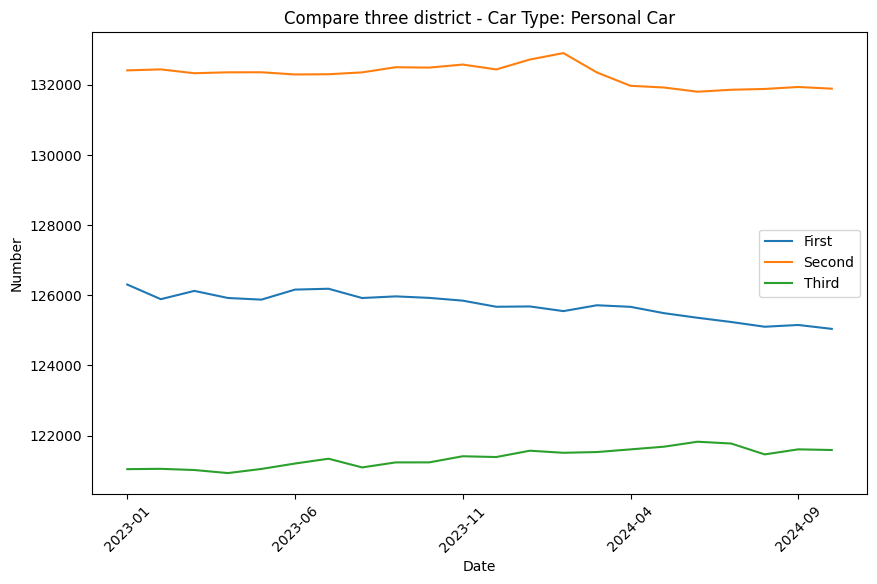

district 1: 구로
district 2: 양천
district 3: 영등포


In [14]:
import pandas as pd
import matplotlib.pyplot as plt


# district = [
#     '강남', '강동', '강북', '강서', '관악', '광진', '구로', '금천', '노원', '도봉',
#     '동대문', '동작', '마포', '서대문', '서초', '성동', '성북', '송파', '양천', '영등포',
#     '용산', '종로', '중구', '중랑'
# ]

district = ['구로', '양천', '영등포']

# 첫번째 데이터
sigungu = df.drop(columns=['id'])
gungu = district[0]
cartype = '승용'

sigungu['date'] = (sigungu['year'].astype(str) + '-' + sigungu['month'].astype(str).str.zfill(2))

tmp = sigungu[(sigungu['district_gugun'].str.contains(gungu)) & (sigungu['car_type'] == cartype)]
tmp = tmp.sort_values(by=['year', 'month'])
tmp = tmp.rename(columns={'num': 'First'})

# 두번쨰 데이터
sigungu2 = df.drop(columns=['id'])
gungu2 = district[1]
cartype2 = '승용'

sigungu2['date'] = (sigungu2['year'].astype(str) + '-' + sigungu2['month'].astype(str).str.zfill(2))

tmp2 = sigungu2[(sigungu2['district_gugun'].str.contains(gungu2)) & (sigungu2['car_type'] == cartype2)]
tmp2 = tmp2.sort_values(by=['year', 'month'])
tmp2 = tmp2.rename(columns={'num': 'Second'})

# 세번째 데이터
sigungu3 = df.drop(columns=['id'])
gungu3 = district[2]
cartype3 = '승용'

sigungu3['date'] = (sigungu3['year'].astype(str) + '-' + sigungu3['month'].astype(str).str.zfill(2))

tmp3 = sigungu3[(sigungu3['district_gugun'].str.contains(gungu3)) & (sigungu3['car_type'] == cartype3)]
tmp3 = tmp3.sort_values(by=['year', 'month'])
tmp3 = tmp3.rename(columns={'num': 'Third'})

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))

# 첫번째 데이터
tmp.reset_index().plot(x='date', y='First', ax=ax, label='First')

# 두번쨰 데이터
tmp2.reset_index().plot(x='date', y='Second', ax=ax, label='Second')

# 세번째 데이터
tmp3.reset_index().plot(x='date', y='Third', ax=ax, label='Third')

# 범례 추가
plt.legend()

# 그래프 제목, x, y축 레이블 추가 (필요에 따라)
plt.title('Compare three district - Car Type: Personal Car')
plt.xlabel('Date')
plt.ylabel('Number')

# x축 레이블 회전 (날짜 형식에 따라 조정)
plt.xticks(rotation=45)

# 그래프 출력
plt.show()

for idx, d in enumerate(district):
    print(f"district {idx+1}:", d)

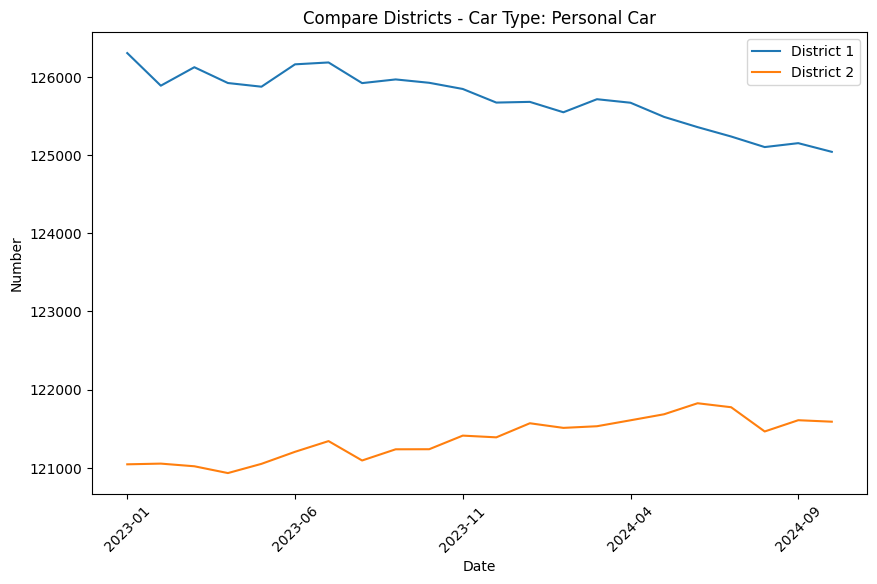

district 1: 구로
district 2: 영등포


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# DISTRICT = [
#     '강남', '강동', '강북', '강서', '관악', '광진', '구로', '금천', '노원', '도봉',
#     '동대문', '동작', '마포', '서대문', '서초', '성동', '성북', '송파', '양천', '영등포',
#     '용산', '종로', '중구', '중랑'
# ]
# district = []

# while(True):
#     tmp = input()
#     if tmp not in DISTRICT:
#         continue
#     if tmp == 0:
#         break
#     district.append(tmp)

# # 10개의 구 리스트
district = ['구로', '영등포', ]

# 그래프 설정
fig, ax = plt.subplots(figsize=(10, 6))

# 10개의 구에 대해 데이터를 처리하고 그래프에 그리기
for i, gungu in enumerate(district):
    # 각 구에 대해 데이터 처리
    sigungu = df.drop(columns=['id'])
    cartype = '승용'

    # 'year'와 'month' 컬럼을 합쳐서 'date' 컬럼 생성
    sigungu['date'] = (sigungu['year'].astype(str) + '-' + sigungu['month'].astype(str).str.zfill(2))

    # 해당 구와 차량 유형에 맞는 데이터 필터링
    tmp = sigungu[(sigungu['district_gugun'].str.contains(gungu)) & (sigungu['car_type'] == cartype)]
    tmp = tmp.sort_values(by=['year', 'month'])
    tmp = tmp.rename(columns={'num': f'District {i+1}'})  # 'District 1', 'District 2'와 같은 이름

    # 해당 구의 데이터를 그래프에 추가
    tmp.reset_index().plot(x='date', y=f'District {i+1}', ax=ax, label=f'District {i+1}')  # 범례도 'District 1', 'District 2'로 표시

# 범례 추가
plt.legend()

# 그래프 제목, x, y축 레이블 추가
plt.title('Compare Districts - Car Type: Personal Car')
plt.xlabel('Date')
plt.ylabel('Number')

# x축 레이블 회전 (날짜 형식에 따라 조정)
plt.xticks(rotation=45)

# 그래프 출력
plt.show()

for idx, d in enumerate(district):
    print(f"district {idx+1}:", d)


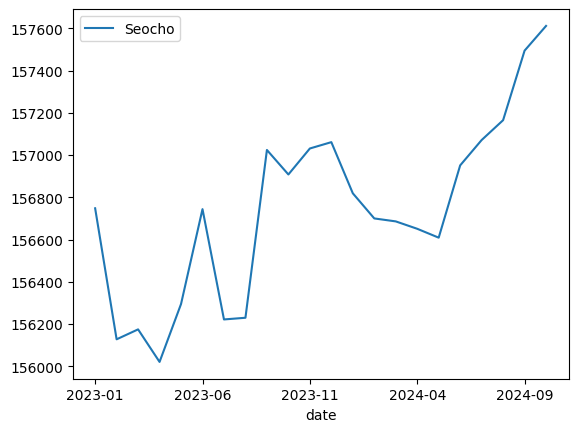

In [25]:
sigungu = df.drop(
    columns=['id']
)
gungu = '서초'
cartype = '승용'

sigungu['date'] = (sigungu['year'].astype(str) + '-' + sigungu['month'].astype(str).str.zfill(2))

tmp = sigungu[(sigungu['district_gugun'].str.contains(gungu)) & (sigungu['car_type'] == cartype)]

# tmp['date'] = pd.to_datetime(tmp['date'], format='%Y%m')

tmp = tmp.sort_values(
    by=['year', 'month']
)
tmp = tmp.rename(
    columns = {
        'num' : 'Seocho'
    }
)
tmp.reset_index().plot(
    x='date', y='Seocho',
    # title='Gangnam'
)
plt.legend()

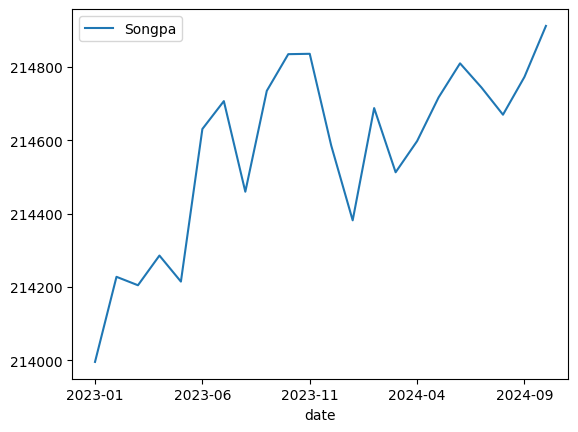

In [27]:
sigungu = df.drop(
    columns=['id']
)
gungu = '송파'
cartype = '승용'

sigungu['date'] = (sigungu['year'].astype(str) + '-' + sigungu['month'].astype(str).str.zfill(2))

tmp = sigungu[(sigungu['district_gugun'].str.contains(gungu)) & (sigungu['car_type'] == cartype)]

# tmp['date'] = pd.to_datetime(tmp['date'], format='%Y%m')

tmp = tmp.sort_values(
    by=['year', 'month']
)
tmp = tmp.rename(
    columns = {
        'num' : 'Songpa'
    }
)
tmp.reset_index().plot(
    x='date', y='Songpa',
    # title='Gangnam'
)
plt.legend()

In [28]:
tmp

,year,month,district_si,district_gugun,Songpa,car_type,date
2567,2023,1,서울,송파,213996,승용,2023-01
2818,2023,2,서울,송파,214228,승용,2023-02
3069,2023,3,서울,송파,214205,승용,2023-03
3320,2023,4,서울,송파,214286,승용,2023-04
3571,2023,5,서울,송파,214215,승용,2023-05
3822,2023,6,서울,송파,214631,승용,2023-06
4073,2023,7,서울,송파구,214707,승용,2023-07
4325,2023,8,서울,송파구,214460,승용,2023-08
4577,2023,9,서울,송파구,214735,승용,2023-09
4829,2023,10,서울,송파구,214835,승용,2023-10


/tmp/ipykernel_6341/4019064501.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['date'] = pd.to_datetime(tmp['date'], format='%Y%m')
/tmp/ipykernel_6341/4019064501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['date'] = pd.to_datetime(tmp['date'], format='%Y%m')
/tmp/ipykernel_6341/4019064501.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

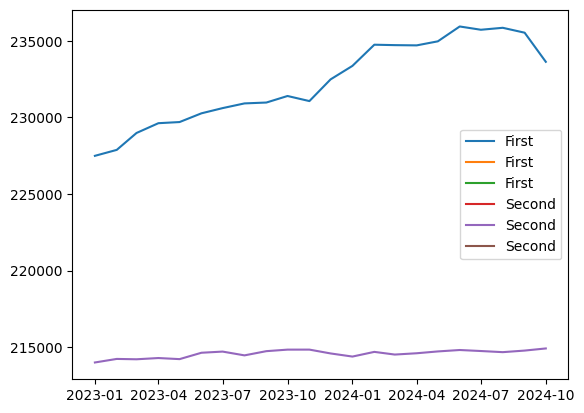

In [7]:
sigungu = df.drop(
    columns=['id']
)
gungu = '강남'
cartype = '승용'

sigungu['date'] = (sigungu['year'].astype(str) + sigungu['month'].astype(str).str.zfill(2)).astype(int)

tmp = sigungu[(sigungu['district_gugun'].str.contains(gungu)) & (sigungu['car_type'] == cartype)]
# tmp['date'] = pd.to_datetime(tmp['date'])
tmp['date'] = pd.to_datetime(tmp['date'], format='%Y%m')

# tmp[['date', 'num']].sort_values(by='date', ascending=True).plot(
#     x='date', y='num', kind='line', marker='o', #linestyle='None'
#     title=f"registration number",
#     # fontproperties=prop
#      label='Gangnam'
# )

x1 = tmp[['date', 'num']].sort_values(by='date', ascending=True).copy()
# print(x1.tail())
x1 = x1.rename(
    columns={
        'num' : 'y1'
    }
)

gungu = '송파'
cartype = '승용'

sigungu['date'] = (sigungu['year'].astype(str) + sigungu['month'].astype(str).str.zfill(2)).astype(int)

tmp = sigungu[(sigungu['district_gugun'].str.contains(gungu)) & (sigungu['car_type'] == cartype)]
# tmp['date'] = pd.to_datetime(tmp['date'])
tmp['date'] = pd.to_datetime(tmp['date'], format='%Y%m')

x2 = tmp[['date', 'num']].sort_values(by='date', ascending=True).copy()

x2 = x2.rename(
    columns={
        'num' : 'y2'
    }
)


gungu = '서초'
cartype = '승용'

sigungu['date'] = (sigungu['year'].astype(str) + sigungu['month'].astype(str).str.zfill(2)).astype(int)

tmp = sigungu[(sigungu['district_gugun'].str.contains(gungu)) & (sigungu['car_type'] == cartype)]
# tmp['date'] = pd.to_datetime(tmp['date'])
tmp['date'] = pd.to_datetime(tmp['date'], format='%Y%m')

x3 = tmp[['date', 'num']].sort_values(by='date', ascending=True).copy()

x3 = x3.rename(
    columns={
        'num' : 'y3'
    }
)


X = pd.concat(
    [x1, x2, x3], axis=1
)

# print(x.tail())

plt.plot(
    X['date'],
    X['y1'],
    label='First'
)

plt.plot(
    X['date'],
    X['y2'],
    label='Second'
)

# plt.plot(
#     X['date'],
#     X['y3'],
#     label='Gangnam'
# )

# tmp[['date', 'num']].sort_values(by='date', ascending=True).plot(
#     x='date', y='num', kind='line', marker='o', #linestyle='None'
#     title=f"registration number",
#     # fontproperties=prop
#      label='Geumcheon'
# )


plt.legend()
plt.show()

In [27]:
X

,date,y1,date,y2
2572,2023-01-01,41556.0,NaT,NaN
2823,2023-02-01,41574.0,NaT,NaN
3074,2023-03-01,41616.0,NaT,NaN
3325,2023-04-01,41598.0,NaT,NaN
3576,2023-05-01,41620.0,NaT,NaN
...,...,...,...,...
2334,NaT,NaN,2024-10-01,34326.0
2344,NaT,NaN,2024-10-01,55142.0
2354,NaT,NaN,2024-10-01,71788.0
2364,NaT,NaN,2024-10-01,85984.0


In [4]:
# disconnect DB
engine.dispose()